In [1]:
import requests as r
import string
from bs4 import BeautifulSoup
from random import randint
from time import sleep
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36"
}

In [2]:
url = 'https://www.macrotrends.net/countries/KEN/kenya/maternal-mortality-rate'
req = r.get(url)
soup = BeautifulSoup(req.text, 'html.parser')
soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/countries/KEN/kenya/maternal-mortality-rate" rel="canonical"/>
<title>Kenya Maternal Mortality Rate 2000-2023 | MacroTrends</title>
<meta content="Maternal mortality ratio is the number of women who die from pregnancy-related causes while pregnant or within 42 days of pregnancy termination per 100,000 live births. The data are estimated with a regression model using information on the proportion of maternal deaths among non-AIDS deaths in women ages 15-49, fertility, birth attendants, and GDP." name="description">
<meta content="" name="robots">
<link href="/assets/i

In [3]:
container = soup.find('div', class_ = 'col-xs-6')
container

<div class="col-xs-6" style="background-color:#fff; margin: 30px 0px 30px 0px; padding:0px 30px 0px 0px;">
<table class="historical_data_table table table-striped table-bordered">
<thead>
<tr>
<th colspan="3" style="text-align:center;">Kenya Maternal Mortality Rate - Historical Data</th>
</tr>
</thead>
<thead>
<tr>
<th style="text-align:center;">Year</th>
<th style="text-align:center;">Per 100K Live Births</th>
<th style="text-align:center;">Annual % Change</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2017</td>
<td style="text-align:center;">342.00</td>
<td style="text-align:center;">-1.16%</td>
</tr>
<tr>
<td style="text-align:center">2016</td>
<td style="text-align:center;">346.00</td>
<td style="text-align:center;">-1.98%</td>
</tr>
<tr>
<td style="text-align:center">2015</td>
<td style="text-align:center;">353.00</td>
<td style="text-align:center;">-1.40%</td>
</tr>
<tr>
<td style="text-align:center">2014</td>
<td style="text-align:center;">358.00</td>
<td style="

In [4]:
headers = []
rows = []
for i, row in enumerate(container.find_all('tr')):
    if i == 0:
        headers = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])
header = ['Year','Per 100K Live Births','Annual % Change']
rows

[[],
 ['2017', '342.00', '-1.16%'],
 ['2016', '346.00', '-1.98%'],
 ['2015', '353.00', '-1.40%'],
 ['2014', '358.00', '-1.65%'],
 ['2013', '364.00', '-2.41%'],
 ['2012', '373.00', '-6.28%'],
 ['2011', '398.00', '-7.87%'],
 ['2010', '432.00', '-8.47%'],
 ['2009', '472.00', '-7.99%'],
 ['2008', '513.00', '-5.87%'],
 ['2007', '545.00', '-6.52%'],
 ['2006', '583.00', '-5.66%'],
 ['2005', '618.00', '-5.36%'],
 ['2004', '653.00', '-3.69%'],
 ['2003', '678.00', '-2.02%'],
 ['2002', '692.00', '-1.42%'],
 ['2001', '702.00', '-0.85%'],
 ['2000', '708.00', '-0.85%']]

In [5]:
import pandas as pd
df = pd.DataFrame(rows, columns = header)
print(df)

    Year Per 100K Live Births Annual % Change
0   None                 None            None
1   2017               342.00          -1.16%
2   2016               346.00          -1.98%
3   2015               353.00          -1.40%
4   2014               358.00          -1.65%
5   2013               364.00          -2.41%
6   2012               373.00          -6.28%
7   2011               398.00          -7.87%
8   2010               432.00          -8.47%
9   2009               472.00          -7.99%
10  2008               513.00          -5.87%
11  2007               545.00          -6.52%
12  2006               583.00          -5.66%
13  2005               618.00          -5.36%
14  2004               653.00          -3.69%
15  2003               678.00          -2.02%
16  2002               692.00          -1.42%
17  2001               702.00          -0.85%
18  2000               708.00          -0.85%


In [6]:
df

,Year,Per 100K Live Births,Annual % Change
0,None,None,None
1,2017,342.00,-1.16%
2,2016,346.00,-1.98%
3,2015,353.00,-1.40%
4,2014,358.00,-1.65%
5,2013,364.00,-2.41%
6,2012,373.00,-6.28%
7,2011,398.00,-7.87%
8,2010,432.00,-8.47%
9,2009,472.00,-7.99%


In [57]:

# Drop first row using drop()
df.drop(index=df.index[0], axis=0, inplace=True)



In [58]:
df

,Year,Per 100K Live Births,Annual % Change
2,2016,346.00,-1.98%
3,2015,353.00,-1.40%
4,2014,358.00,-1.65%
5,2013,364.00,-2.41%
6,2012,373.00,-6.28%
7,2011,398.00,-7.87%
8,2010,432.00,-8.47%
9,2009,472.00,-7.99%
10,2008,513.00,-5.87%
11,2007,545.00,-6.52%


In [65]:
df['Year'] = df['Year'].astype(str).astype(int)


In [70]:
df['Per 100K Live Births'] = df['Per 100K Live Births'].astype(str).astype(float)
#df['Annual % Change'] = df['Annual % Change'].astype(str).astype(float)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 2 to 18
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  17 non-null     int32  
 1   Per 100K Live Births  17 non-null     float64
 2   Annual % Change       17 non-null     object 
dtypes: float64(1), int32(1), object(1)
memory usage: 472.0+ bytes


Text(0.5, 1.0, 'Maternal Death rates')

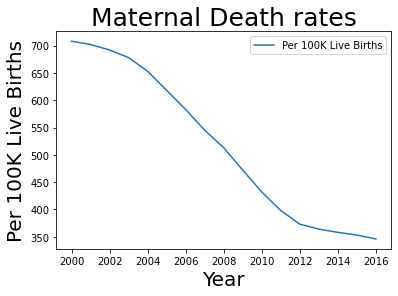

In [74]:
#line graph showing the mortality rate
import matplotlib.pyplot as plt
df.plot(x="Year", y="Per 100K Live Births")
plt.xlabel("Year",  size = 20)
plt.ylabel("Per 100K Live Births", size = 20)
plt.title("Maternal Death rates", size = 25)

In [9]:
#mortality rates in different counties
url2 = 'https://link.springer.com/article/10.1186/1471-2393-14-38/tables/2'
req2 = r.get(url2)
soup2 = BeautifulSoup(req2.text, 'html.parser')
soup2


<!DOCTYPE html>

<html class="no-js" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="pc,mobile" name="applicable-device"/>
<meta content="Yes" name="access"/>
<meta content="Maternal mortality is high in Africa, especially in Kenya where there is evidence of insufficient progress towards Millennium Development Goal (MDG) Five, which is to reduce the global maternal mortality rate by three quarters and provide universal access to reproductive health by 2015. This study aims to identify risk factors associated with maternal mortality in a tertiary level hospital in Kenya. A manual review of records for 150 maternal deaths (cases) and 300 controls was undertaken using a standard audit form. The sample included pregnant women aged 15-49 years admitted to the Obstetric and Gynaecological wards at the Moi Teaching and Referral Hospital (MTRH) in Kenya from Ja

In [10]:
container2 = soup2.find('div', class_ = 'c-article-table-border c-table-scroll-wrapper')
container2

<div class="c-article-table-border c-table-scroll-wrapper"><div class="c-table-scroll-wrapper__content" data-component-scroll-wrapper=""><table class="data last-table"><thead class="c-article-table-head"><tr><th class="u-text-left" colspan="6"><p>History of prevailing medical conditions</p></th></tr><tr><th class="u-text-left"><p>Risk factor</p></th><th class="u-text-left"><p>Cases n = 150 n (%)</p></th><th class="u-text-left"><p>Controls n = 300 n (%)</p></th><th class="u-text-left"><p>Unadjusted OR (95% CI)</p></th><th class="u-text-left"><p>Adjusted OR (95% CI)<sup>a</sup>
</p></th><th class="u-text-left"><p>P-value<sup>†</sup>
</p></th></tr></thead><tbody><tr><td class="u-text-left"><p>
<b>Smoking</b>
</p></td><td class="u-text-left"> </td><td class="u-text-left"> </td><td class="u-text-left"> </td><td class="u-text-left"> </td><td class="u-text-left"> </td></tr><tr><td class="u-text-left"><p>Yes</p></td><td class="u-text-left"><p>2(1)</p></td><td class="u-text-left"><p>7(2)</p></t

In [11]:
rows2 = []
for i, row in enumerate(container2.find_all('tr')):
    if i == 0:
        headers = [el.text.strip() for el in row.find_all('th')]
    else:
        rows2.append([el.text.strip() for el in row.find_all('td')])
header = ['Year','Per 100K Live Births','Annual % Change']
rows2

[[],
 ['Smoking', '', '', '', '', ''],
 ['Yes', '2(1)', '7(2)', '0.6(0.1–2.7)', '', ''],
 ['No', '148(99)', '286(98)', '1', '', ''],
 ['Alcohol', '', '', '', '', '0.018'],
 ['Yes', '16(11)', '20(7)', '1.6(0.8–3.2)', '2.5(1.2–5.3)', ''],
 ['No', '134(89)', '273(93)', '1', '', ''],
 ['Contraceptives', '', '', '', '', '0.0007'],
 ['Yes', '17(11)', '74(25)', '0.4(0.2–0.7)', '0.3(0.1–0.6)', ''],
 ['No', '133(89)', '220(75)', '1', '', ''],
 ['Abortion', '', '', '', '', ''],
 ['Yes', '11(7)', '20(7)', '1.1(0.5–2.4)', '', ''],
 ['No', '139(93)', '279(93)', '1', '', ''],
 ['Twins', '', '', '', '', ''],
 ['Yes', '10(7)', '17(6)', '1.2(0.5–2.7)', '', ''],
 ['No', '140(93)', '283(94)', '1', '', ''],
 ['Gravida', '', '', '', '', '0.0049'],
 ['Primigravida', '34(23)', '104(35)', '1', '', ''],
 ['Multigravida', '73(49)', '153(51)', '1.5(0.9–2.4)', '1.5(0.9–2.5)', ''],
 ['Grandmultigravida', '43(29)', '43(14)', '3.1(1.7–5.4)', '2.6(1.4–4.8)', ''],
 ['Underlying medical conditions*', '', '', '', '', ''

In [12]:
name = ['Risk factor','Cases n = 150 n (%)','Controls n = 300 n (%)','Unadjusted OR (95% CI)','Adjusted OR (95% CI)a','P-value†']
df2 = pd.DataFrame(rows2, columns = name)
print(df2)

                                   Risk factor Cases n = 150 n (%)  \
0                                         None                None   
1                                      Smoking                       
2                                          Yes                2(1)   
3                                           No             148(99)   
4                                      Alcohol                       
5                                          Yes              16(11)   
6                                           No             134(89)   
7                               Contraceptives                       
8                                          Yes              17(11)   
9                                           No             133(89)   
10                                    Abortion                       
11                                         Yes               11(7)   
12                                          No             139(93)   
13                  

In [13]:
#dataframe containing records of risk factors that leads to maternal death
# Drop first row using drop()
df2.drop(index=df2.index[0], axis=0, inplace=False)
print(df2)


                                   Risk factor Cases n = 150 n (%)  \
0                                         None                None   
1                                      Smoking                       
2                                          Yes                2(1)   
3                                           No             148(99)   
4                                      Alcohol                       
5                                          Yes              16(11)   
6                                           No             134(89)   
7                               Contraceptives                       
8                                          Yes              17(11)   
9                                           No             133(89)   
10                                    Abortion                       
11                                         Yes               11(7)   
12                                          No             139(93)   
13                  

In [14]:
df2

,Risk factor,Cases n = 150 n (%),Controls n = 300 n (%),Unadjusted OR (95% CI),Adjusted OR (95% CI)a,P-value†
0,None,None,None,None,None,None
1,Smoking,,,,,
2,Yes,2(1),7(2),0.6(0.1–2.7),,
3,No,148(99),286(98),1,,
4,Alcohol,,,,,0.018
5,Yes,16(11),20(7),1.6(0.8–3.2),2.5(1.2–5.3),
6,No,134(89),273(93),1,,
7,Contraceptives,,,,,0.0007
8,Yes,17(11),74(25),0.4(0.2–0.7),0.3(0.1–0.6),
9,No,133(89),220(75),1,,


Splitting the df2 dataframe to two dataframes one containing just the risk factors and the other will contain other characteristics

RISK FACTORS TABLE

In [39]:
risk_facts = df2.iloc[:23]
risk_facts

,Risk factor,Cases n = 150 n (%),Controls n = 300 n (%),Unadjusted OR (95% CI),Adjusted OR (95% CI)a,P-value†
0,None,None,None,None,None,None
1,Smoking,,,,,
2,Yes,2(1),7(2),0.6(0.1–2.7),,
3,No,148(99),286(98),1,,
4,Alcohol,,,,,0.018
5,Yes,16(11),20(7),1.6(0.8–3.2),2.5(1.2–5.3),
6,No,134(89),273(93),1,,
7,Contraceptives,,,,,0.0007
8,Yes,17(11),74(25),0.4(0.2–0.7),0.3(0.1–0.6),
9,No,133(89),220(75),1,,


In [44]:
head = ['Risk_factores','yes_death','no_death','yes_survived','no_survived']
list1 = [['Smoking', '2', '148','7','286'],
['Alcohol','16','134','20','273'],
['Contraceptives','17','133','74','220'],
['Abortion','11','139','20','279'],
['Twins','10','140','17','283'],
['Underlying_medical_conditions','41','109','29','271']]
risk_facts2 = pd.DataFrame(list1, columns = head)
print(risk_facts2 )

                   Risk_factores yes_death no_death yes_survived no_survived
0                        Smoking         2      148            7         286
1                        Alcohol        16      134           20         273
2                 Contraceptives        17      133           74         220
3                       Abortion        11      139           20         279
4                          Twins        10      140           17         283
5  Underlying_medical_conditions        41      109           29         271


In [45]:
risk_facts2

,Risk_factores,yes_death,no_death,yes_survived,no_survived
0,Smoking,2,148,7,286
1,Alcohol,16,134,20,273
2,Contraceptives,17,133,74,220
3,Abortion,11,139,20,279
4,Twins,10,140,17,283
5,Underlying_medical_conditions,41,109,29,271


In [77]:
risk_facts2 = risk_facts2.astype({"yes_death":"int","no_death":"int","yes_survived" : "int","no_survived" : "int"})

In [78]:
risk_facts2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Risk_factores  6 non-null      object
 1   yes_death      6 non-null      int32 
 2   no_death       6 non-null      int32 
 3   yes_survived   6 non-null      int32 
 4   no_survived    6 non-null      int32 
dtypes: int32(4), object(1)
memory usage: 272.0+ bytes


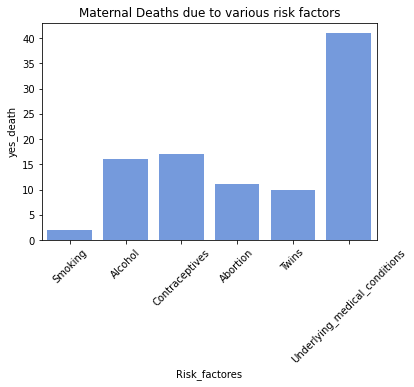

In [109]:
#Maternal Deaths
import seaborn as sns
sns.barplot(x="Risk_factores", y="yes_death", data=risk_facts2,color = 'cornflowerblue')
plt.title('Maternal Deaths due to various risk factors')
plt.xticks(rotation=45)
plt.show()

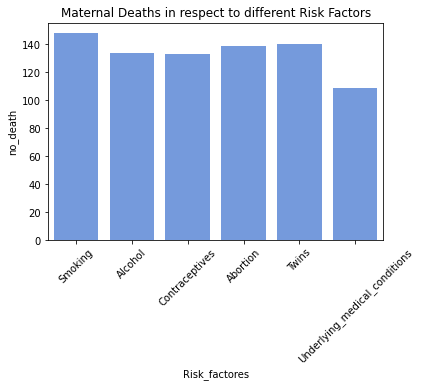

In [121]:
sns.barplot(x="Risk_factores", y="no_death", data=risk_facts2,color = 'cornflowerblue')
plt.title('Maternal Deaths in respect to different Risk Factors')
plt.xticks(rotation=45)
plt.show()

CHARACTESRTICS TABLE

In [24]:
characteristics = df2.iloc[23:]
characteristics

,Risk factor,Cases n = 150 n (%),Controls n = 300 n (%),Unadjusted OR (95% CI),Adjusted OR (95% CI)a,P-value†
23,Obstetric and reproductive characteristics,,,,,
24,Mode of delivery,,,,,0.0006
25,Normal,64(43),230(77),1,,
26,Assisted,27(18),13(4),7.5(3.6–15.3),4.4(1.7–11.2),
27,Caesarean,51(34),57(19),3.2(2.0–5.1),3.0(1.5–5.6),
28,Did not deliver,8(5),0,omitted,omitted,
29,Birth attendant,,,,,<0.0001
30,Nurse/midwife,70(53),264(89),1,1,
31,Doctor,61(47),31(11),7.4(4.5–12.3),4.1(2.2–7.6),
32,Pregnancy stage,,,,,<0.0001


In [46]:
head2 = ['Obstetric-and-reproductive-characteristics','Deaths','Survived']
list2 = [['Mode-of-delivery_normal','64','230'],
        ['Mode-of-delivery_assisted','27','13'],
        ['Mode-of-delivery_cs','51','57'],
        ['Mode-of-delivery_Did not deliver','8','0'],
        ['Birth-attendant_Nurse','70','264'],
        ['Birth-attendant_Doctor','61','31'],
        ['Pregnancy-stage_ntrapartum','61','259'],
        ['Pregnancy-stage_Antepartum','53','29'],
        ['Pregnancy-stage_Puerperium','30','12'],
        ['Labour-stage_Latent','42','68'],
        ['Labour-stage_Active','37','180'],
        ['Labour-stage_Active_secondStage', '20','34'],
        ['ANC-visits_1to3','71','199'],
        ['ANC-visits_None','59','14'],
        ['ANC-visits_Above 4','11','83'],
         ['Place-of-ANC-attendance_Healthcentre','41','122'],
         ['Place-of-ANC-attendance_Hospital','26','60'],
         ['Place-of-ANC-attendance_MTRH','19','100'],
         ['Place-of-ANC-attendance_None','59','14']
        ]
characteristics2 = pd.DataFrame(list2, columns = head2)


In [47]:
characteristics2

,Obstetric-and-reproductive-characteristics,Deaths,Survived
0,Mode-of-delivery_normal,64,230
1,Mode-of-delivery_assisted,27,13
2,Mode-of-delivery_cs,51,57
3,Mode-of-delivery_Did not deliver,8,0
4,Birth-attendant_Nurse,70,264
5,Birth-attendant_Doctor,61,31
6,Pregnancy-stage_ntrapartum,61,259
7,Pregnancy-stage_Antepartum,53,29
8,Pregnancy-stage_Puerperium,30,12
9,Labour-stage_Latent,42,68


In [94]:
characteristics2= characteristics2.astype({"Deaths":"int","Survived":"int"})

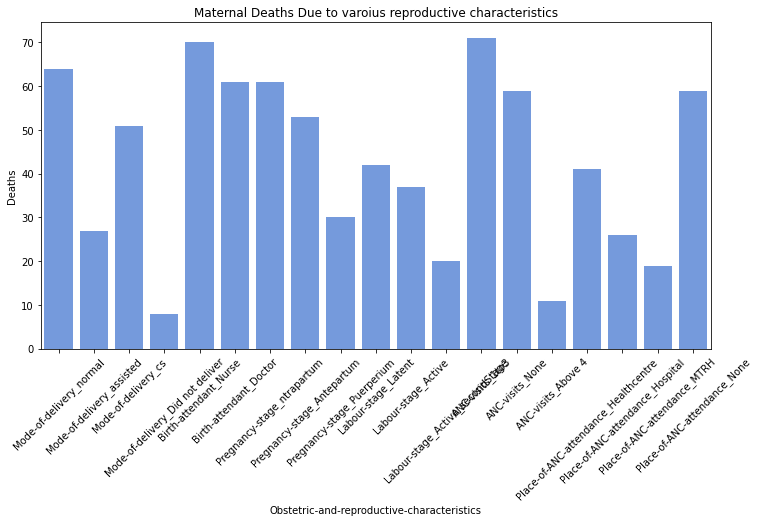

In [106]:
##chart plotting maternal Deathsht by various reproductive characteristics
plt.figure(figsize=(12,6))
sns.barplot(x="Obstetric-and-reproductive-characteristics", y="Deaths", data=characteristics2,color = 'cornflowerblue')
plt.title('Maternal Deaths Due to varoius reproductive characteristics')
plt.xticks(rotation=45)
plt.show()

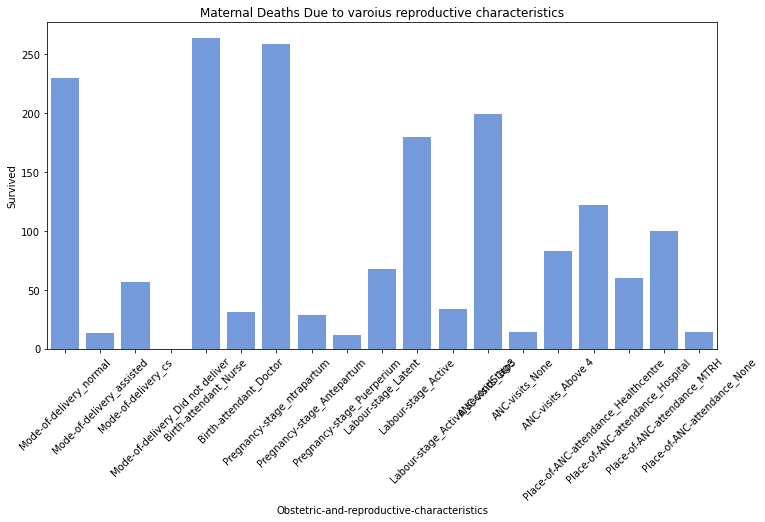

In [107]:
#chart plotting maternal Survival brought by various reproductive characteristics
plt.figure(figsize=(12,6))
sns.barplot(x="Obstetric-and-reproductive-characteristics", y="Survived", data=characteristics2,color = 'cornflowerblue')
plt.title('Maternal Deaths Due to varoius reproductive characteristics')
plt.xticks(rotation=45)
plt.show()

In [16]:
#scrapping data from the web
url3 = 'https://link.springer.com/article/10.1186/1471-2393-14-38/tables/3'
req3 = r.get(url3)
soup3 = BeautifulSoup(req3.text, 'html.parser')
soup3


<!DOCTYPE html>

<html class="no-js" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="pc,mobile" name="applicable-device"/>
<meta content="Yes" name="access"/>
<meta content="Maternal mortality is high in Africa, especially in Kenya where there is evidence of insufficient progress towards Millennium Development Goal (MDG) Five, which is to reduce the global maternal mortality rate by three quarters and provide universal access to reproductive health by 2015. This study aims to identify risk factors associated with maternal mortality in a tertiary level hospital in Kenya. A manual review of records for 150 maternal deaths (cases) and 300 controls was undertaken using a standard audit form. The sample included pregnant women aged 15-49 years admitted to the Obstetric and Gynaecological wards at the Moi Teaching and Referral Hospital (MTRH) in Kenya from Ja

In [17]:
#scrapping data from the web
container3= soup3.find('tbody')
container3

<tbody><tr><td class="u-text-left"><p>
<b>Comorbid complications</b>
</p></td><td class="u-text-left"> </td><td class="u-text-left"> </td><td class="u-text-left"> </td><td class="u-text-left"> </td><td class="u-text-left"><p>&lt;0.0001</p></td></tr><tr><td class="u-text-left"><p>Yes</p></td><td class="u-text-left"><p>93(62)</p></td><td class="u-text-left"><p>63(21)</p></td><td class="u-text-left"><p>0.2(0.1–0.3)</p></td><td class="u-text-left"><p>6.7(3.8–11.8)</p></td><td class="u-text-left"> </td></tr><tr><td class="u-text-left"><p>No</p></td><td class="u-text-left"><p>57(38)</p></td><td class="u-text-left"><p>237(79)</p></td><td class="u-text-left"><p>1</p></td><td class="u-text-left"><p>1</p></td><td class="u-text-left"> </td></tr><tr><td class="u-text-left"><p>
<b>Eclampsia</b>
</p></td><td class="u-text-left"> </td><td class="u-text-left"> </td><td class="u-text-left"> </td><td class="u-text-left"> </td><td class="u-text-left"><p>0.0038</p></td></tr><tr><td class="u-text-left"><p>

In [18]:
rows3 = []
for i, row in enumerate(container3.find_all('tr')):
    if i == 0:
        headers = [el.text.strip() for el in row.find_all('th')]
    else:
        rows3.append([el.text.strip() for el in row.find_all('td')])
header = ['Year','Per 100K Live Births','Annual % Change']
rows3

[['Yes', '93(62)', '63(21)', '0.2(0.1–0.3)', '6.7(3.8–11.8)', ''],
 ['No', '57(38)', '237(79)', '1', '1', ''],
 ['Eclampsia', '', '', '', '', '0.0038'],
 ['Yes', '33(22)', '16(5)', '5.0(2.7–9.4)', '4.7(1.6–13.7)', ''],
 ['No', '117(78)', '284(95)', '1', '1', ''],
 ['Dystocia', '', '', '', '', ''],
 ['Yes', '21(14)', '51(17)', '0.8(0.5–1.4)', '', ''],
 ['No', '129(86)', '249(83)', '1', '', ''],
 ['Haemorrhage', '', '', '', '', ''],
 ['Yes', '20(13)', '15(5)', '2.9(1.5–5.9)', '', ''],
 ['No', '120(87)', '285(95)', '1', '', ''],
 ['Diastolic blood pressure (mm HG)**', '', '', '', '', '0.0039'],
 ['Normal', '102(72)', '280(96)', '1', '1', ''],
 ['Low', '16(11)', '2(1)', '22.0(5.0–97.2)', '7.5(1.5–37.7)', ''],
 ['High', '24(17)', '10(3)', '6.6(3.0–14.3)', '3.2(0.9–10.6)', ''],
 ['Systolic blood pressure (mm HG)**', '', '', '', '', ''],
 ['Normal', '93(65)', '271(93)', '1', '', ''],
 ['Low', '33(23)', '6(2)', '16.0(6.5–39.5)', '', ''],
 ['High', '17(12)', '15(5)', '3.3(1.6–6.9)', '', ''],
 [

In [19]:
#creation of new data frame
name2 = ['Risk factor','Cases n = 150 n (%)','Controls n = 300 n (%)','Unadjusted OR (95% CI)','Adjusted OR (95% CI)a','P-value†']
df3 = pd.DataFrame(rows3, columns = name2)
print(df3)

                           Risk factor Cases n = 150 n (%)  \
0                                  Yes              93(62)   
1                                   No              57(38)   
2                            Eclampsia                       
3                                  Yes              33(22)   
4                                   No             117(78)   
5                             Dystocia                       
6                                  Yes              21(14)   
7                                   No             129(86)   
8                          Haemorrhage                       
9                                  Yes              20(13)   
10                                  No             120(87)   
11  Diastolic blood pressure (mm HG)**                       
12                              Normal             102(72)   
13                                 Low              16(11)   
14                                High              24(17)   
15   Sys

In [20]:
#Droping the first rows
df3.drop(index=df3.index[:1], axis=0, inplace=True)
print(df3)


                           Risk factor Cases n = 150 n (%)  \
1                                   No              57(38)   
2                            Eclampsia                       
3                                  Yes              33(22)   
4                                   No             117(78)   
5                             Dystocia                       
6                                  Yes              21(14)   
7                                   No             129(86)   
8                          Haemorrhage                       
9                                  Yes              20(13)   
10                                  No             120(87)   
11  Diastolic blood pressure (mm HG)**                       
12                              Normal             102(72)   
13                                 Low              16(11)   
14                                High              24(17)   
15   Systolic blood pressure (mm HG)**                       
16      

In [21]:
df3

,Risk factor,Cases n = 150 n (%),Controls n = 300 n (%),Unadjusted OR (95% CI),Adjusted OR (95% CI)a,P-value†
1,No,57(38),237(79),1,1,
2,Eclampsia,,,,,0.0038
3,Yes,33(22),16(5),5.0(2.7–9.4),4.7(1.6–13.7),
4,No,117(78),284(95),1,1,
5,Dystocia,,,,,
6,Yes,21(14),51(17),0.8(0.5–1.4),,
7,No,129(86),249(83),1,,
8,Haemorrhage,,,,,
9,Yes,20(13),15(5),2.9(1.5–5.9),,
10,No,120(87),285(95),1,,


In [51]:
head3 = ['Causes','yes_Deaths','no_deaths','yes_Survived','No_Survived']
list3 = [['Eclampsia','33','117','16','284'],
        ['Dystocia','21','129','51','249'],
        ['Haemorrhage','20','120','15','285'],
        ['referral','87','63','66','234']]
causes = pd.DataFrame(list3, columns = head3)


In [52]:
causes

,Causes,yes_Deaths,no_deaths,yes_Survived,No_Survived
0,Eclampsia,33,117,16,284
1,Dystocia,21,129,51,249
2,Haemorrhage,20,120,15,285
3,referral,87,63,66,234


In [111]:
causes= causes.astype({"yes_Deaths":"int","no_deaths":"int","yes_Survived":"int","No_Survived":"int"})

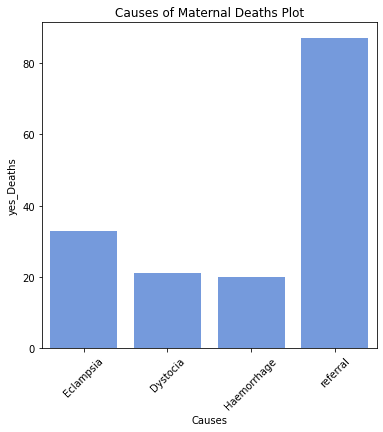

In [115]:
plt.figure(figsize=(6,6))
sns.barplot(x="Causes", y="yes_Deaths", data=causes,color = 'cornflowerblue')
plt.title('Causes of Maternal Deaths Plot')
plt.xticks(rotation=45)
plt.show()

In [55]:

head4 = ['features','Deaths','Survived']
list4 = [['Diastolic-BP_Normal','102','280'],
        ['Diastolic-BP_Low','16','2'],
        ['Diastolic-BP_High','24','10'],
        ['Haemoglobin_<10g/dl','63','43'],
        ['Haemoglobin_.10g/dl','59','171'],
        ['Pulse_<110 bpm','103','283'],
        ['Pulse_>=110 bpm','41','4'],
        ['Temperature_<37.5','110','205'],
        ['Temperature_>=37.5','24','11']]

In [56]:
featrures = pd.DataFrame(list4, columns = head4)
featrures 

,features,Deaths,Survived
0,Diastolic-BP_Normal,102,280
1,Diastolic-BP_Low,16,2
2,Diastolic-BP_High,24,10
3,Haemoglobin_<10g/dl,63,43
4,Haemoglobin_.10g/dl,59,171
5,Pulse_<110 bpm,103,283
6,Pulse_>=110 bpm,41,4
7,Temperature_<37.5,110,205
8,Temperature_>=37.5,24,11


In [117]:
#converting values to integers 
featrures = featrures .astype({"Deaths":"int","Survived":"int"})

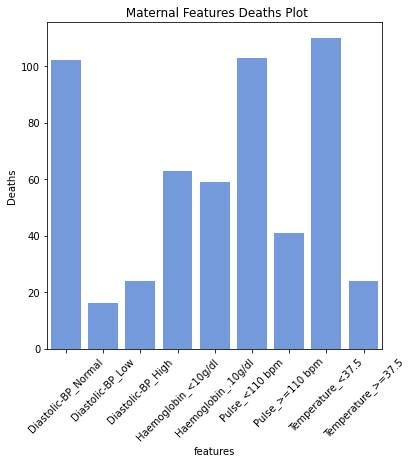

In [118]:
#Bar plot illustrating common Featues that led to maternal deaths
plt.figure(figsize=(6,6))
sns.barplot(x="features", y="Deaths", data=featrures ,color = 'cornflowerblue')
plt.title(' Maternal Features Deaths Plot')
plt.xticks(rotation=45)
plt.show()

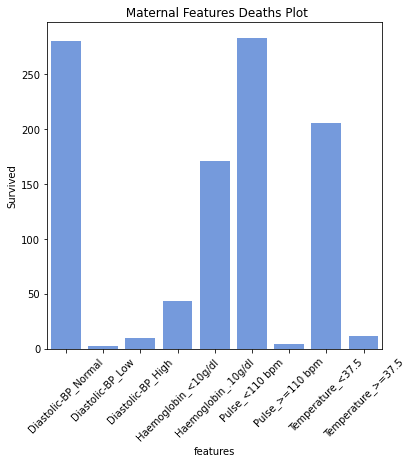

In [119]:
#Bar plot demonstarting features that leads to the mother survival
plt.figure(figsize=(6,6))
sns.barplot(x="features", y="Survived", data=featrures ,color = 'cornflowerblue')
plt.title(' Maternal Features Deaths Plot')
plt.xticks(rotation=45)
plt.show()